In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

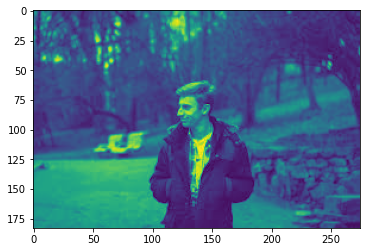

In [2]:
image_dir = 'examples/images.jpg'
img = cv2.imread(image_dir)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

pil_im = Image.fromarray(gray, 'L')
imshow(np.asarray(pil_im))


result_img = img.copy()

In [3]:
img.shape

(183, 275, 3)

In [4]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
SCALE_FACTOR = 1.3
BLUE_COLOR = (255, 0, 0)
MIN_NEIGHBORS = 5

In [8]:
#faces = face_cascade.detectMultiScale(image=gray, scaleFactor=25, minNeighbors=50, minSize=(30,30))
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


In [9]:
type(img)

numpy.ndarray

In [10]:
img.shape

(183, 275, 3)

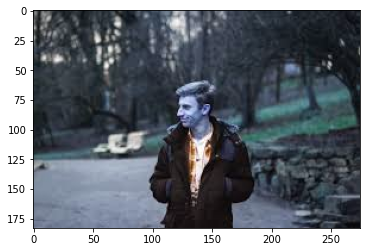

In [11]:
pil_im = Image.fromarray(img)
imshow(np.asarray(pil_im))

In [12]:
if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = [ v for v in f ]

        # get the rectangle img around all the faces
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = img[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle image
        sub_face = cv2.GaussianBlur(sub_face,(35,35), 35)
        # merge this blurry rectangle to our final image
        result_img[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
        face_file_name = "./face_" + str(y) + ".jpg"
        #cv2.imwrite(face_file_name, sub_face)

In [13]:
faces

()

In [14]:
pil_im = Image.fromarray(sub_face)
imshow(np.asarray(pil_im))

NameError: name 'sub_face' is not defined

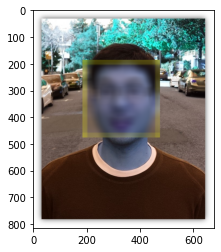

In [81]:
pil_im = Image.fromarray(result_img)
imshow(np.asarray(pil_im))